 # Importowanie bibliotek

In [15]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import time

 # Przygotowanie próbek

In [16]:
iterations=100
nr_indeks=254479
X,t=make_regression(n_samples=2579,n_features=1,noise=16,random_state=nr_indeks)

 # Analityczna regresja liniowa

Czas wykonywania analitycznej regresji liniowej dla 100 iteracji:	0.028 sekund


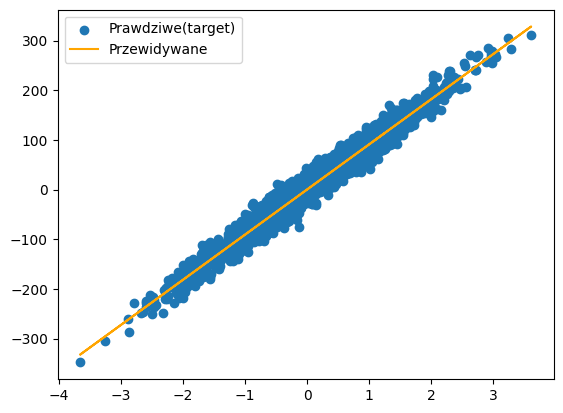

In [17]:
def analytic_linear_regression(X,t):
    X_=np.c_[np.ones(X.shape[0]),X]
    w=np.linalg.inv(X_.T@X_)@X_.T@t
    y=X_@w
    return y
start_time=time.time()
for _ in range(iterations):
    y=analytic_linear_regression(X,t)
analytic_time=time.time()-start_time
print(f"Czas wykonywania analitycznej regresji liniowej dla {iterations} iteracji:\t{analytic_time:.03f} sekund")
plt.scatter(X,t,label="Prawdziwe(target)")
plt.plot(X,y,label="Przewidywane",color="orange")
plt.legend()

 # Numeryczna regresja liniowa

Czas wykonywania analitycznej regresji liniowej dla 100 iteracji:	0.028 sekund	Czas wykonywania numerycznej regresji liniowej dla 100 iteracji:	0.448 sekund
MSE dla wersji analitycznej:	259.43467345614374
MSE dla wersji numerycznej	259.4346734561437



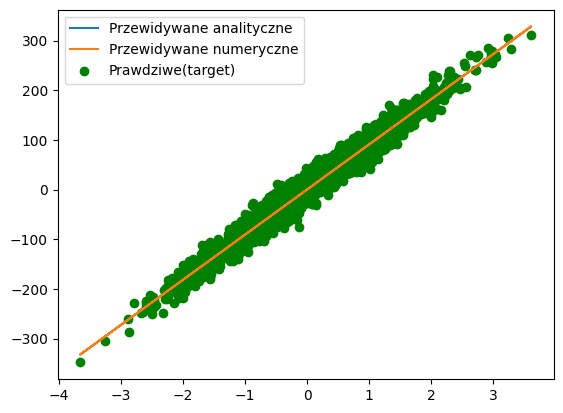

In [18]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
def numerical_linear_regression(X,t):
    X_=np.c_[np.ones(X.shape[0]),X]
    def MSE(Theta):  
        return np.mean((t-X_@Theta)**2)

    w_r=np.random.random_sample(2) #Losowa Theta

    #Szkuanie minimum funkcji MSE ze startowym wektorem parametrów w_r
    res=minimize(MSE,w_r,method='Powell')
    Theta=res.x
    y_n=X_@Theta
    return y_n

start_time=time.time()
for _ in range(iterations):
    y_n=numerical_linear_regression(X,t)
numerical_time=time.time()-start_time
print(f"Czas wykonywania analitycznej regresji liniowej dla {iterations} iteracji:\t{analytic_time:.03f} sekund\tCzas wykonywania numerycznej regresji liniowej dla {iterations} iteracji:\t{numerical_time:.03f} sekund")
print(f"MSE dla wersji analitycznej:\t{mean_squared_error(t,y)}\nMSE dla wersji numerycznej\t{mean_squared_error(t,y_n)}\n")

plt.plot(X,y,label="Przewidywane analityczne")
plt.plot(X,y_n, label="Przewidywane numeryczne")
plt.scatter(X,t,label="Prawdziwe(target)",color="green")
plt.legend()

 # Wczytywanie danych z FlapPy bird

In [19]:
zbiory=[np.loadtxt(f'zbior{i}.csv', delimiter=',') for i in range(1,4)]

Czas wykonywania analitycznej regresji liniowej dla wielomianu 9 stopnia dla 100 iteracji:	
          0.021 sekund
          	Czas wykonywania analitycznej regresji liniowej dla wielomianu 21 stopnia dla 100 iteracji:	0.044 sekund
          
Czas wykonywania regresji liniowej z scikit dla wielomianu 9 stopnia dla 100 iteracji:	0.095 sekund
          	Czas wykonywania regresji liniowej z scikit dla wielomianu 21 stopnia dla 100 iteracji:	0.161 sekund
          
MSE dla implementacji analitycznej 9 stopnia:	36.04927484745452
MSE dla implementacji analitycznej 21 stopnia:	3506.256184814564
MSE dla wielomianu 9-stopnia:	36.049274847454456
MSE dla wielomianu 21-stopnia:	1.4706578287227299


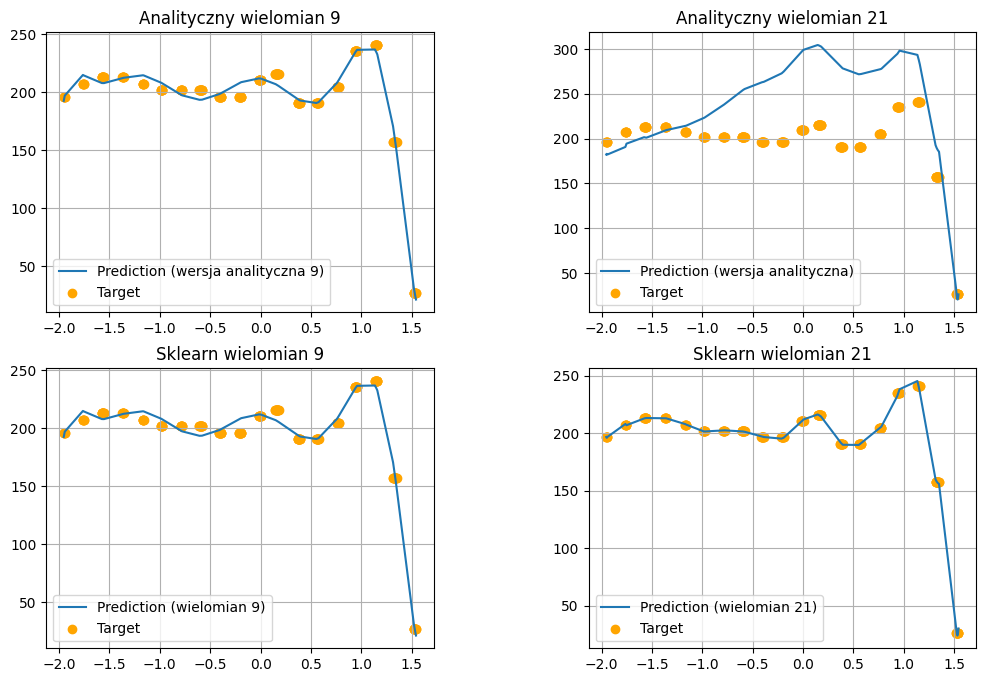

Czas wykonywania analitycznej regresji liniowej dla wielomianu 9 stopnia dla 100 iteracji:	
          0.057 sekund
          	Czas wykonywania analitycznej regresji liniowej dla wielomianu 21 stopnia dla 100 iteracji:	0.091 sekund
          
Czas wykonywania regresji liniowej z scikit dla wielomianu 9 stopnia dla 100 iteracji:	0.153 sekund
          	Czas wykonywania regresji liniowej z scikit dla wielomianu 21 stopnia dla 100 iteracji:	0.190 sekund
          
MSE dla implementacji analitycznej 9 stopnia:	60.99966948059263
MSE dla implementacji analitycznej 21 stopnia:	426.6766363190957
MSE dla wielomianu 9-stopnia:	60.99966948059237
MSE dla wielomianu 21-stopnia:	13.541512116732836


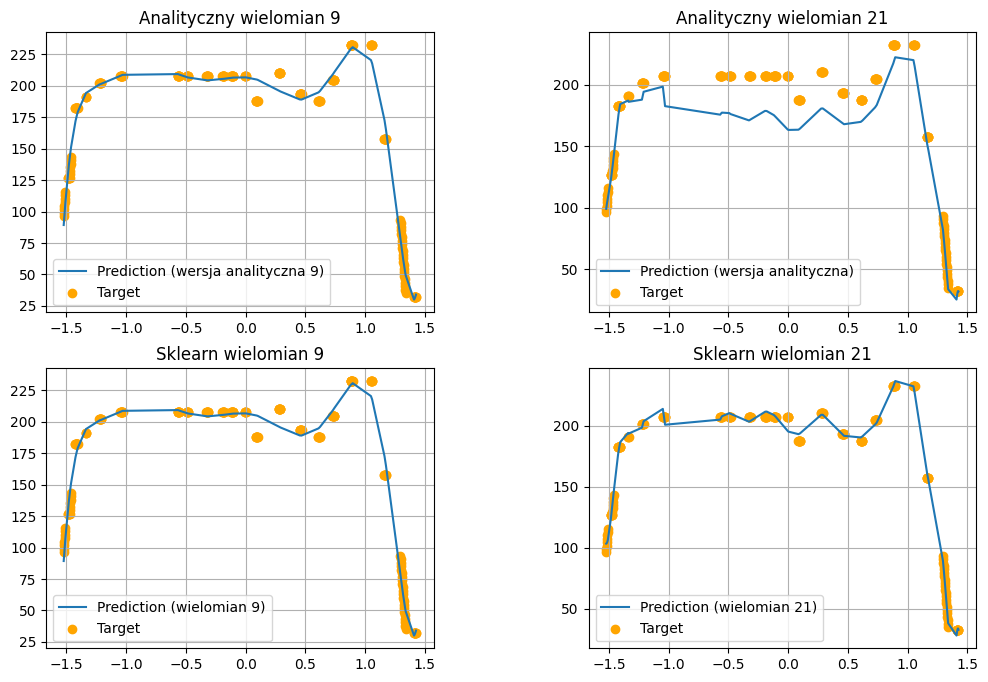

Czas wykonywania analitycznej regresji liniowej dla wielomianu 9 stopnia dla 100 iteracji:	
          0.052 sekund
          	Czas wykonywania analitycznej regresji liniowej dla wielomianu 21 stopnia dla 100 iteracji:	0.074 sekund
          
Czas wykonywania regresji liniowej z scikit dla wielomianu 9 stopnia dla 100 iteracji:	0.142 sekund
          	Czas wykonywania regresji liniowej z scikit dla wielomianu 21 stopnia dla 100 iteracji:	0.252 sekund
          
MSE dla implementacji analitycznej 9 stopnia:	84.90125840679886
MSE dla implementacji analitycznej 21 stopnia:	27.811589182135844
MSE dla wielomianu 9-stopnia:	84.90125840679885
MSE dla wielomianu 21-stopnia:	27.23612404519235


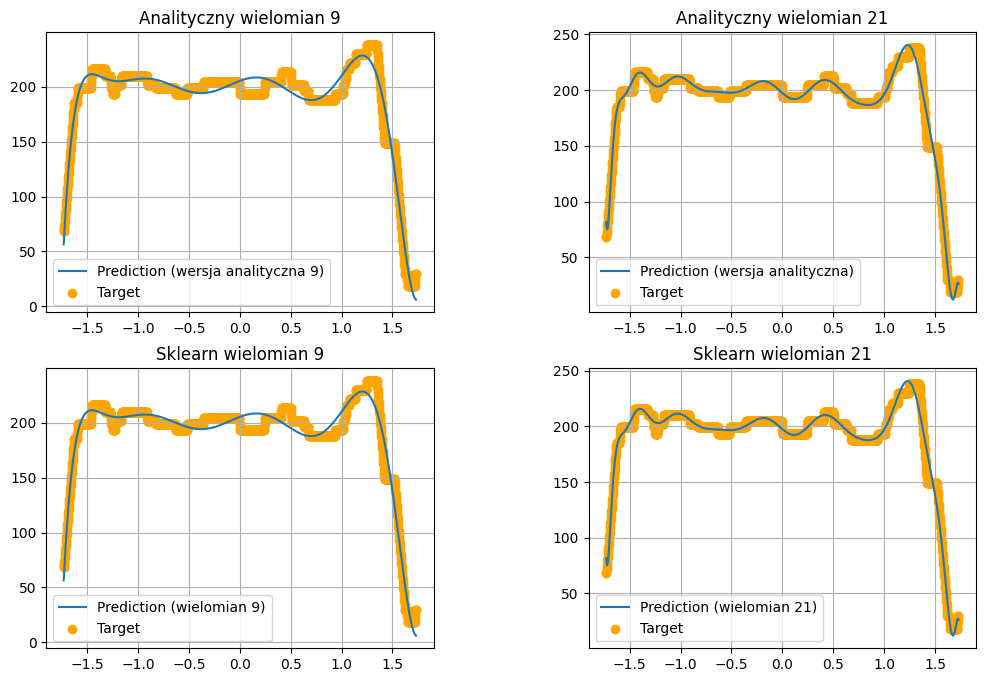

In [20]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression

p9=PolynomialFeatures(9,include_bias=False)
p21=PolynomialFeatures(21,include_bias=False)

for zbior in zbiory:
    X=zbior[:,0].reshape(-1,1)
    t=zbior[:,1]
    
    #Standaryzacja danych
    scaler=StandardScaler()
    X=scaler.fit_transform(X)



    #Regresja liniowa dla wielomianu 9 stopnia
    X_poly=p9.fit_transform(X)
    #Analityczna regresja liniowa
    start_time=time.time()
    for _ in range(iterations):
        y9=analytic_linear_regression(X_poly,t)
    analytic9_time=time.time()-start_time

    start_time=time.time()
    model=LinearRegression()
    for _ in range(iterations):
        reg=model.fit(X_poly,t)
        y_pred9=reg.predict(X_poly)
    p9_time=time.time()-start_time

    #Regresja liniowa dla wielomianu 21 stopnia
    X_poly=p21.fit_transform(X)

    #Analityczna regresja liniowa
    start_time=time.time()
    for _ in range(iterations):
        y21=analytic_linear_regression(X_poly,t)
    analytic21_time=time.time()-start_time

    start_time=time.time()
    for _ in range(iterations):
        reg=model.fit(X_poly,t)
        y_pred21=reg.predict(X_poly)
    p21_time=time.time()-start_time
    print(f"""Czas wykonywania analitycznej regresji liniowej dla wielomianu 9 stopnia dla {iterations} iteracji:\t
          {analytic9_time:.03f} sekund
          \tCzas wykonywania analitycznej regresji liniowej dla wielomianu 21 stopnia dla {iterations} iteracji:\t{analytic21_time:.03f} sekund
          \nCzas wykonywania regresji liniowej z scikit dla wielomianu 9 stopnia dla {iterations} iteracji:\t{p9_time:.03f} sekund
          \tCzas wykonywania regresji liniowej z scikit dla wielomianu 21 stopnia dla {iterations} iteracji:\t{p21_time:.03f} sekund
          """)
    #Wyświetlanie wyników i porównanie MSE
    print(f"MSE dla implementacji analitycznej 9 stopnia:\t{mean_squared_error(t,y9)}\nMSE dla implementacji analitycznej 21 stopnia:\t{mean_squared_error(t,y21)}\nMSE dla wielomianu 9-stopnia:\t{mean_squared_error(t,y_pred9)}\nMSE dla wielomianu 21-stopnia:\t{mean_squared_error(t,y_pred21)}")
    fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(12,8))

    ax1.plot(X,y9,label="Prediction (wersja analityczna 9)")
    ax1.scatter(X,t,label="Target",color="orange")
    ax1.set_title("Analityczny wielomian 9")
    ax1.grid()
    ax1.legend()
    
    ax2.plot(X,y21,label="Prediction (wersja analityczna)")
    ax2.scatter(X,t,label="Target",color="orange")
    ax2.set_title("Analityczny wielomian 21")
    ax2.grid()
    ax2.legend()

    ax3.plot(X,y_pred9,label="Prediction (wielomian 9)")
    ax3.scatter(X,t,label="Target",color="orange")
    ax3.set_title("Sklearn wielomian 9")
    ax3.grid()
    ax3.legend()

    ax4.plot(X,y_pred21,label="Prediction (wielomian 21)")
    ax4.scatter(X,t,label="Target",color="orange")
    ax4.set_title("Sklearn wielomian 21")
    ax4.grid()
    ax4.legend()
    plt.subplots_adjust(wspace=0.4)
    plt.show()

 Obserwując wykresy można zauważyć, że z dopasowaniem trasy najlepiej sobie radzi  wielomian 21 stopnia z scikit.
 Ponadto z wybranych metod regresji dla każdego zbioru ma najmniejszy błąd średniokwadratowy, co świadczy o największej dokładności

 # Ridge regression
 Analityczna implementacja oraz jej scikitowy odpowiednik, odwzorowują trasę z bardzo podobną dokładnością.

Czas wykonywania analitycznej Ridge regression dla 100 iteracji:	0.037 sekund
Czas wykonywania ridge regression z sklearn dla 100 iteracji:	0.076 sekund
MSE dla implementacji analitycznej Ridge:	30.924469929922665
MSE dla Ridge z sklearn i wielomianu 16-stopnia:	30.504240664997894



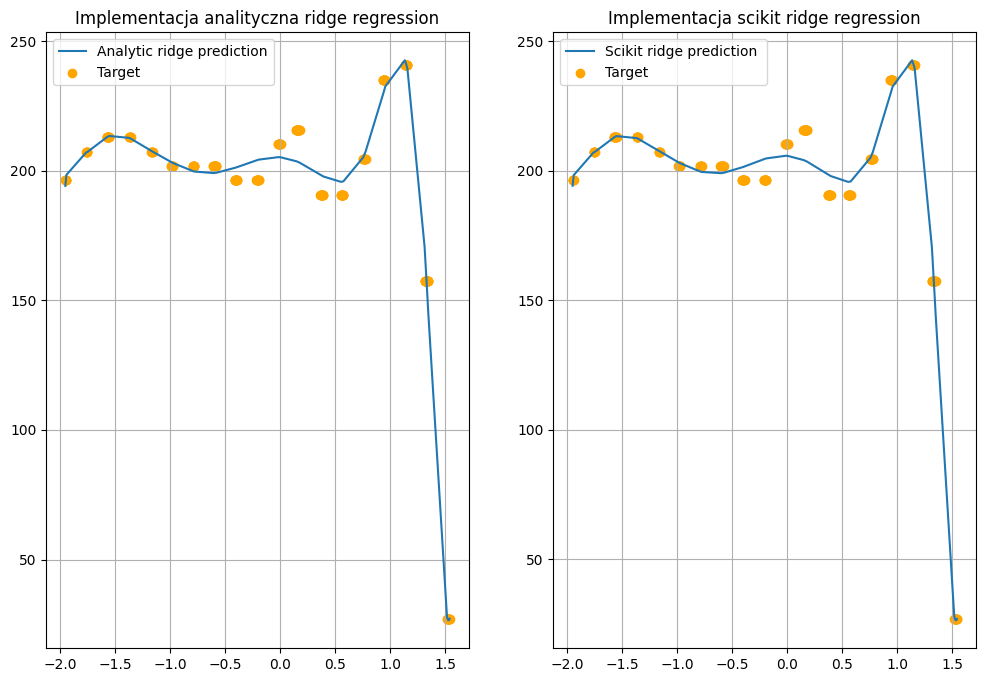

Czas wykonywania analitycznej Ridge regression dla 100 iteracji:	0.048 sekund
Czas wykonywania ridge regression z sklearn dla 100 iteracji:	0.178 sekund
MSE dla implementacji analitycznej Ridge:	62.44784908885233
MSE dla Ridge z sklearn i wielomianu 16-stopnia:	62.195917999881324



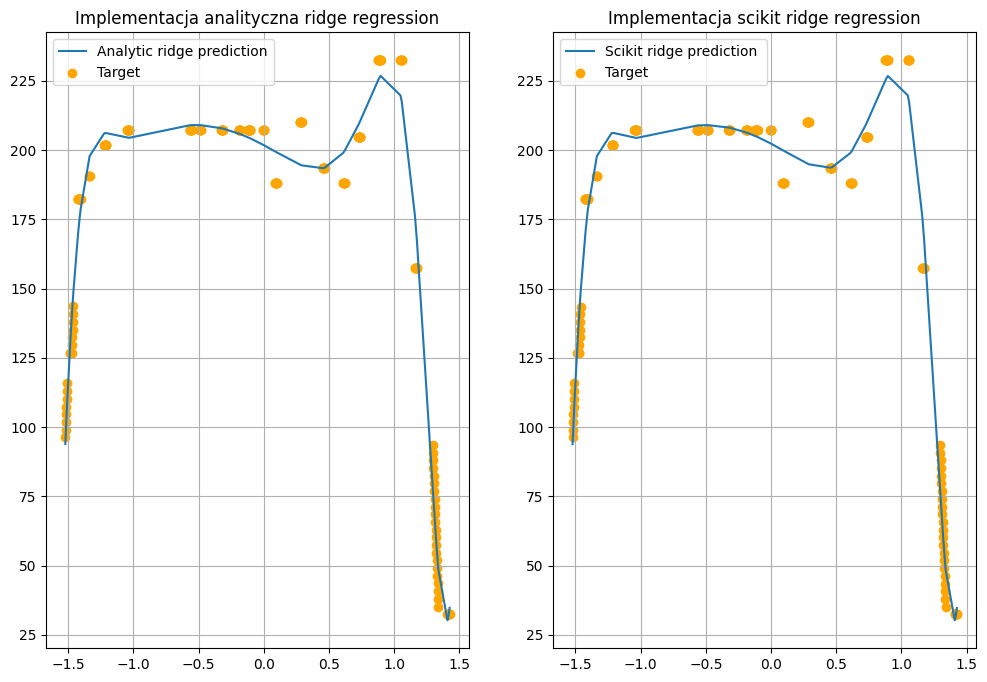

Czas wykonywania analitycznej Ridge regression dla 100 iteracji:	0.144 sekund
Czas wykonywania ridge regression z sklearn dla 100 iteracji:	0.331 sekund
MSE dla implementacji analitycznej Ridge:	56.555175457056016
MSE dla Ridge z sklearn i wielomianu 16-stopnia:	56.57218183494752



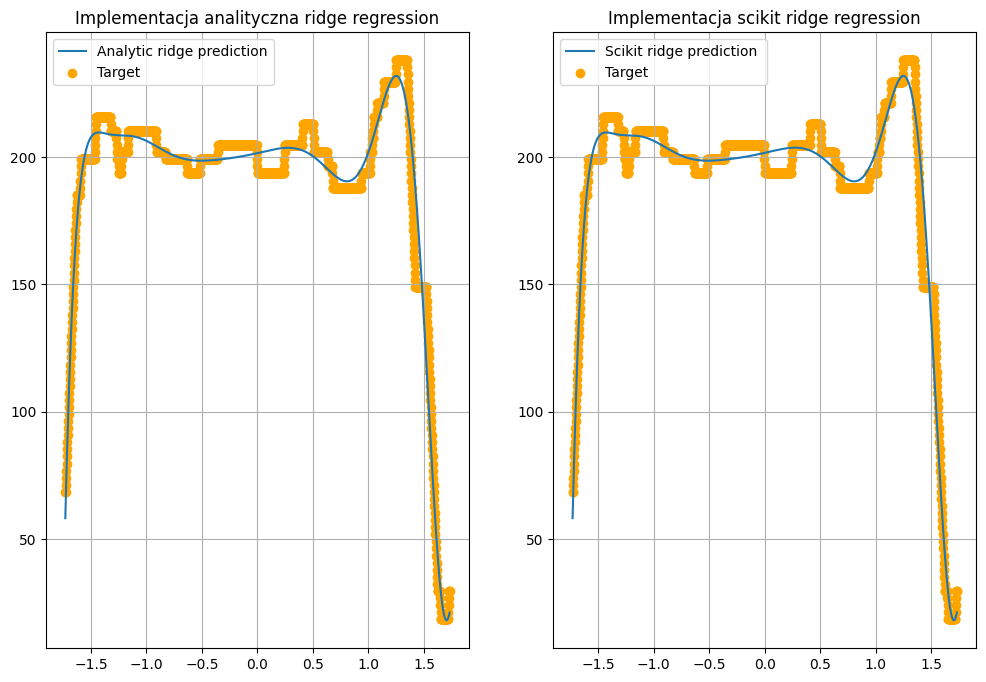

In [21]:
from sklearn.linear_model import Ridge
alpha=0.1
def ridge_regression(X,t,alpha):
    I=np.eye(X.shape[1])#Macierz jednostkowa
    w_=np.linalg.inv(X.T@X +alpha*I)@X.T@t #Obliczana Theta
    y=X@w_ #Wyznaczany zbiór y
    return y

for zbior in zbiory:
    #wczytywanie danych
    X=zbior[:,0].reshape(-1,1)
    t=zbior[:,1]

    #Normalizacja danych wejściowych
    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    #Tworzony jest wielmian 16 stopnia dla danych wejściowych
    p16=PolynomialFeatures(16,include_bias=True)
    X16=p16.fit_transform(X)

    #Wyznaczany jest zbiór y, za pomocą analitycznej implementacji ridge regression
    start_time=time.time()
    for _ in range(iterations):
        y=ridge_regression(X16,t,alpha)
    analytic_ridge_time=time.time()-start_time

    #Wyznaczany jest zbiór y_ridge za pomocą klasy Ridge z sklearn
    start_time=time.time()
    ridge=Ridge(alpha=alpha)
    for _ in range(iterations):
        ridge=ridge.fit(X16,t)
        y_ridge=ridge.predict(X16)
    sklearn_ridge_time=time.time()-start_time

    print(f"Czas wykonywania analitycznej Ridge regression dla {iterations} iteracji:\t{analytic_ridge_time:.03f} sekund\nCzas wykonywania ridge regression z sklearn dla {iterations} iteracji:\t{sklearn_ridge_time:.03f} sekund")

    print(f"MSE dla implementacji analitycznej Ridge:\t{mean_squared_error(t,y)}\nMSE dla Ridge z sklearn i wielomianu 16-stopnia:\t{mean_squared_error(t,y_ridge)}\n")
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,8))

    ax1.plot(X,y, label="Analytic ridge prediction")
    ax1.scatter(X,t,label="Target",color="orange")
    ax1.set_title("Implementacja analityczna ridge regression")
    ax1.grid()
    ax1.legend()

    ax2.plot(X,y_ridge,label="Scikit ridge prediction ")
    ax2.scatter(X,t,label="Target",color="orange")
    ax2.set_title("Implementacja scikit ridge regression")
    ax2.grid()
    ax2.legend()
    plt.show()